# Import libraries

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

# Data Cleaning

In [2]:
df = pd.read_csv("airline_train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.shape

(103904, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [13]:
plt.pie(df["Gender"].value_counts(normalize=True), autopct="%1.0f%%", color=sns.palettes("YlOrBr"), labels=df["Gender"].unique)

TypeError: 'module' object is not callable

In [5]:
# Dropping useless features
# df.drop(columns=df.iloc[:,[0,1]], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer Type                      103904 non-null  object 
 1   Age                                103904 non-null  int64  
 2   Type of Travel                     103904 non-null  object 
 3   Class                              103904 non-null  object 
 4   Flight Distance                    103904 non-null  int64  
 5   Inflight wifi service              103904 non-null  int64  
 6   Departure/Arrival time convenient  103904 non-null  int64  
 7   Ease of Online booking             103904 non-null  int64  
 8   Gate location                      103904 non-null  int64  
 9   Food and drink                     103904 non-null  int64  
 10  Online boarding                    103904 non-null  int64  
 11  Seat comfort                       1039

In [4]:
# Convert type of columns having categorical values
categorical_index = [0,2,3,5]+list(range(6,21))
df.iloc[:,categorical_index] = df.iloc[:,categorical_index].astype("category")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Customer Type                      103904 non-null  object  
 1   Age                                103904 non-null  int64   
 2   Type of Travel                     103904 non-null  object  
 3   Class                              103904 non-null  object  
 4   Flight Distance                    103904 non-null  int64   
 5   Inflight wifi service              103904 non-null  category
 6   Departure/Arrival time convenient  103904 non-null  category
 7   Ease of Online booking             103904 non-null  category
 8   Gate location                      103904 non-null  category
 9   Food and drink                     103904 non-null  category
 10  Online boarding                    103904 non-null  category
 11  Seat comfort              

In [5]:
df["Age"] = df["Age"].astype("int64")

In [28]:
df.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']] = df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].astype("float64")

In [7]:
df[['Customer Type', 'Type of Travel', 'Class']] = df[['Customer Type', 'Type of Travel', 'Class']].astype("category")

# Data Viz and Feature Engg

In [31]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [37]:
df.describe(include="category")

,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


In [39]:
# Proportion of satisfied/dissatisfied customers
df.satisfaction.value_counts(normalize=True)*100

satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64

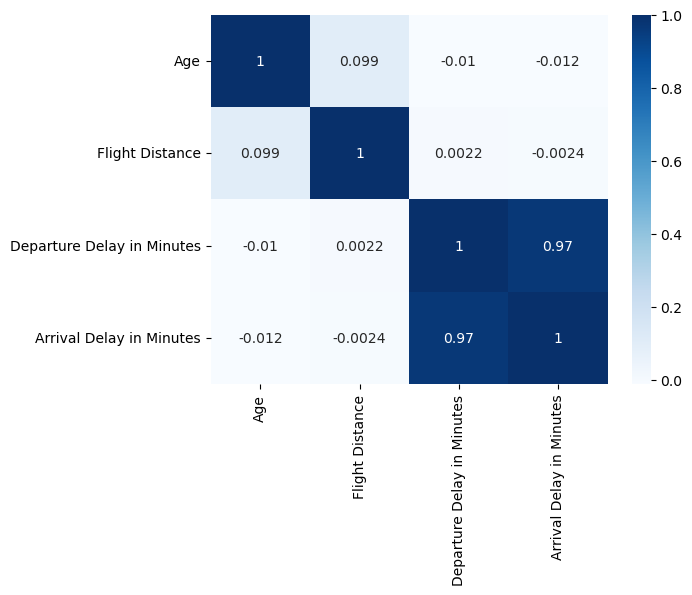

In [12]:
# Correlation Check
sns.heatmap(df.select_dtypes(include="number").corr(), cmap="Blues", annot=True);

## Inference from corr check
- There is very strong correlation b/w arrival delay in mins and department delay in mins

In [14]:
# Scatterplot b/w highly correlated features

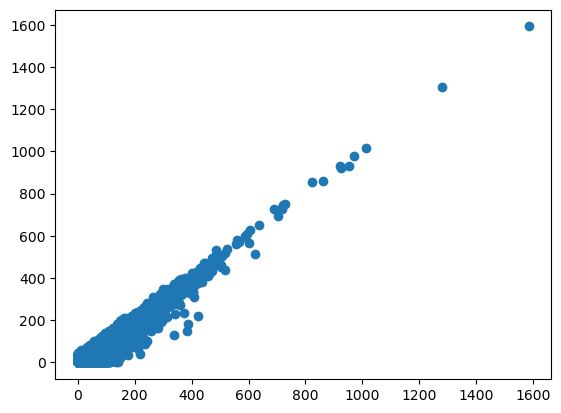

In [19]:
plt.scatter(df["Arrival Delay in Minutes"], df["Departure Delay in Minutes"]);

## Inference made from scatterplot
- Plot suggests a strong linear relation b/w arrival and depart that suggests that at the time of depart if there is delay, 
the same delay gets reflected in arrival

In [22]:
catlist = list(df.select_dtypes(include="category").columns)

In [23]:
categ = df.loc[:,catlist]
categ.head()

,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [25]:
v = df["Class"].value_counts()

In [27]:
v.values

array([49665, 46745,  7494], dtype=int64)

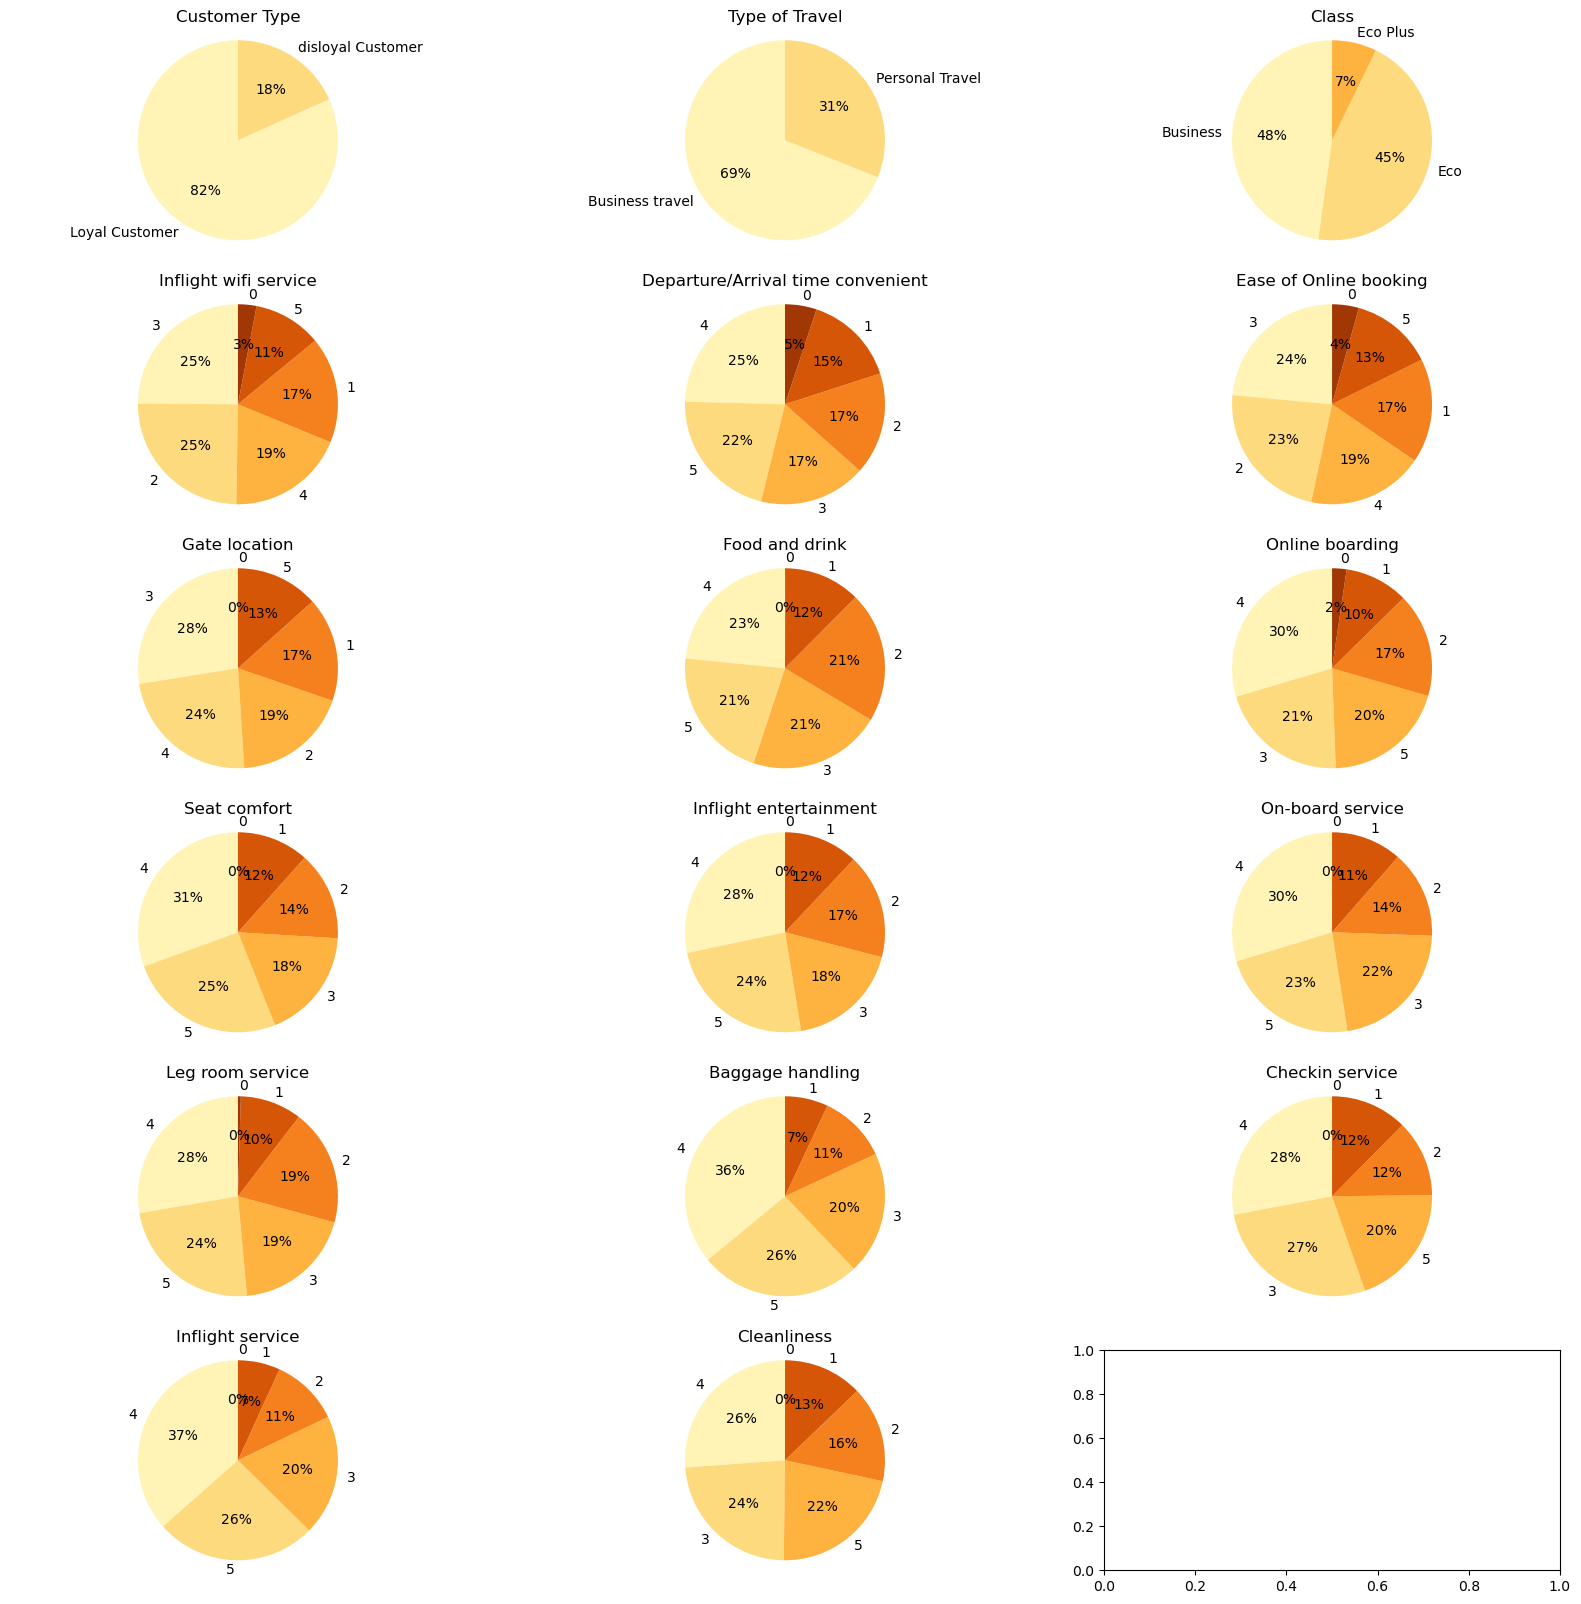

In [38]:
fig, ax = plt.subplots(6,3,figsize=(20, 20))
for i, col in enumerate(categ):
    col_vals = categ[col].value_counts()
    labels = col_vals.index
    sizes = col_vals.values
    ax[i//3, i%3].pie(sizes, labels=labels, colors=sns.color_palette("YlOrBr"), autopct="%1.0f%%", startangle=90)
    ax[i//3, i%3].axis("equal")
    ax[i//3, i%3].set_title(col)
plt.show();    

## Inferences made from the pie plot
- Majority of the customers were loyal/repeat customers.
- Major reason for travel was for business
- About 50% travelled in business class
- About 56% of the travellers were satisfied with their seat comfortness(4-5 rating)
- About 62% of the travellers were satisfied with their baggage handling(4-5 rating)
- About 63% of the travellers were satisfied with their inflight services(4-5 rating)

## Visualizing the relation b/w Customer Type And Age

In [44]:
df.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

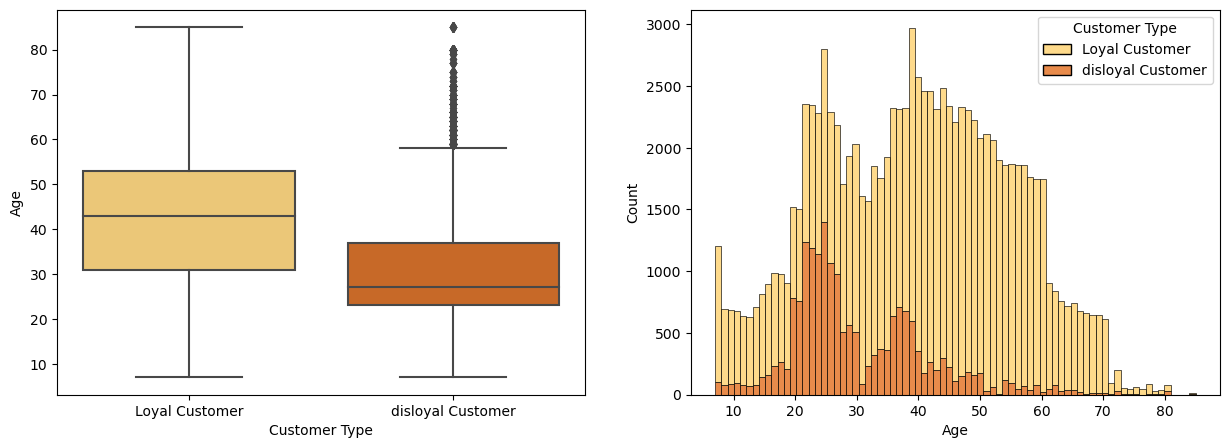

In [51]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(df, x="Customer Type", y="Age", palette="YlOrBr", ax=ax[0])
sns.histplot(df, x="Age", hue="Customer Type", multiple="stack", palette="YlOrBr", ax=ax[1])
plt.show();

## Inference from the box plot'
- loyal customers are in the [30-50] age grp
- Avg age of loyal cust are above 40 years of age
- Disloyal customers are younger in age compared to loyal cust

## Viz relation b/w age and class

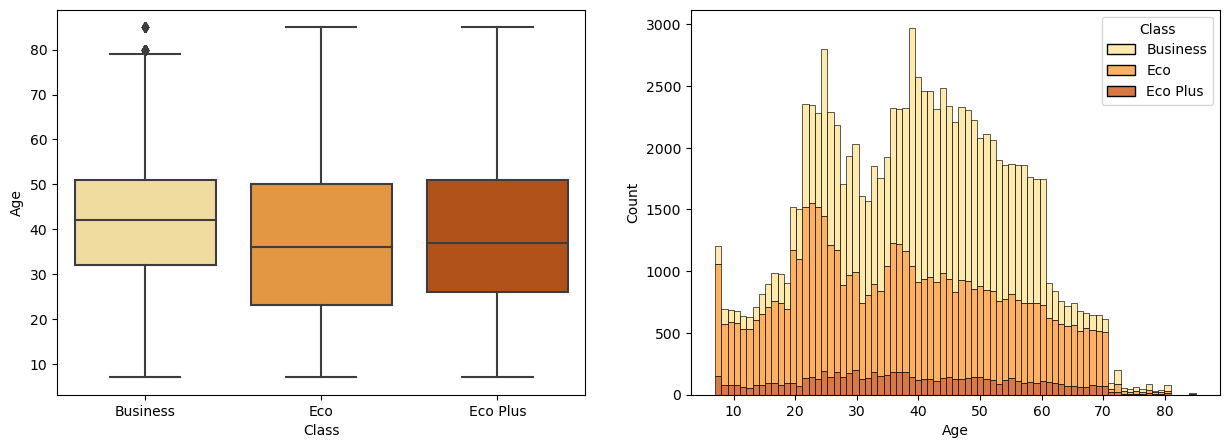

In [53]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(df, x="Class", y="Age", palette="YlOrBr", ax=ax[0])
sns.histplot(df, x="Age", hue="Class", multiple="stack", palette="YlOrBr", ax=ax[1])
plt.show();

## Inference made from above plot
- Loyal customers prefer to travel in business class most of the time

## Viz b/w class and flight distance

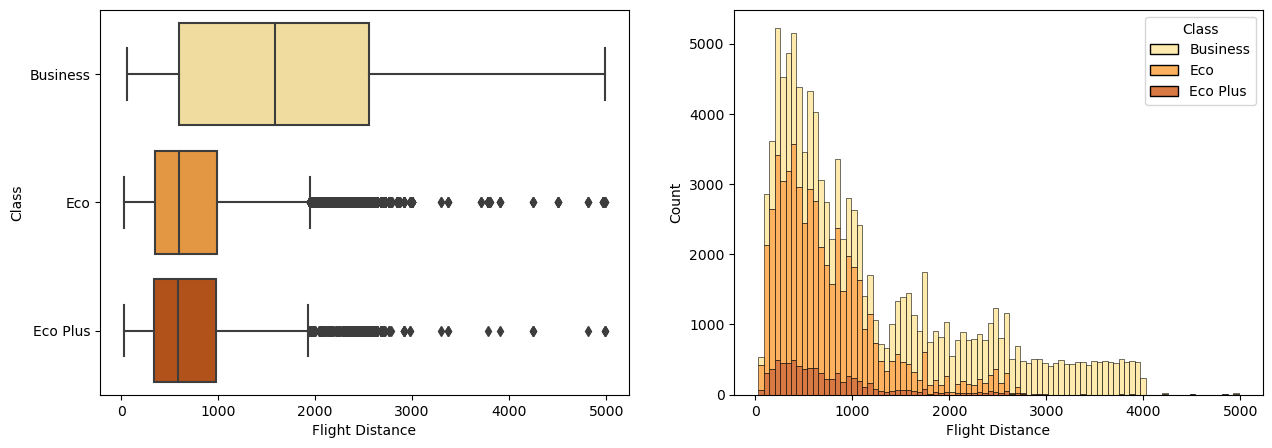

In [56]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(df, x="Flight Distance", y="Class", palette="YlOrBr", ax=ax[0])
sns.histplot(df, x="Flight Distance", hue="Class", multiple="stack", palette="YlOrBr", ax=ax[1])
plt.show();

## Inference frm above plot
- Customers who fly longer distances use business class

## Viz relation b/w inflight entertainment, leg room service and flight distance

In [61]:
df.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

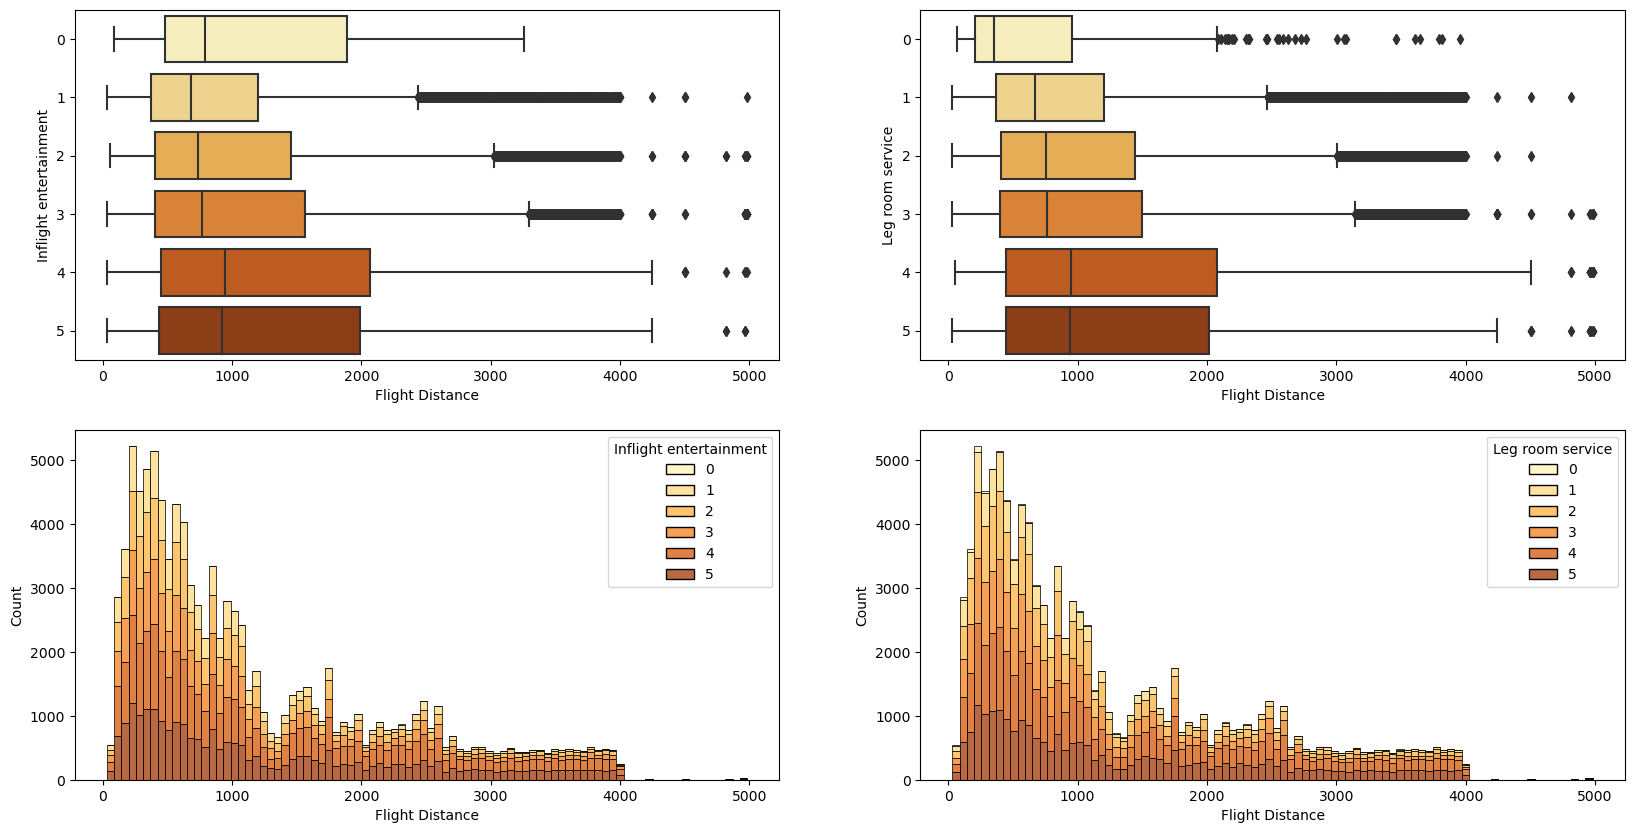

In [65]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.boxplot(df, x="Flight Distance", y="Inflight entertainment", palette="YlOrBr", ax=ax[0,0])
sns.boxplot(df, x="Flight Distance", y="Leg room service", palette="YlOrBr", ax=ax[0,1])
sns.histplot(df, x="Flight Distance", hue="Inflight entertainment", multiple="stack", palette="YlOrBr", ax=ax[1,0])
sns.histplot(df, x="Flight Distance", hue="Leg room service", multiple="stack", palette="YlOrBr", ax=ax[1,1])
plt.show();

## Inference from the above plot

- As evident from the plot, we can see that customers who fly long distances are satisfied with inflight entertainment and leg room services[4-5]ratings

## Viz b/w class & satisfaction

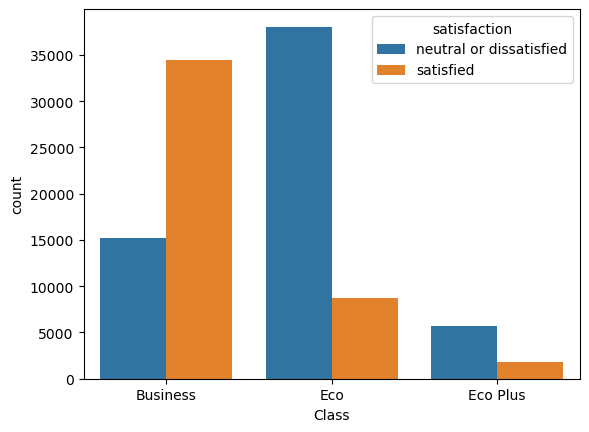

In [68]:
sns.countplot(df, x="Class", hue="satisfaction");

## Inference from above plot
- Business class passengers were very satisfied with their experience compared to other class

In [69]:
df.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

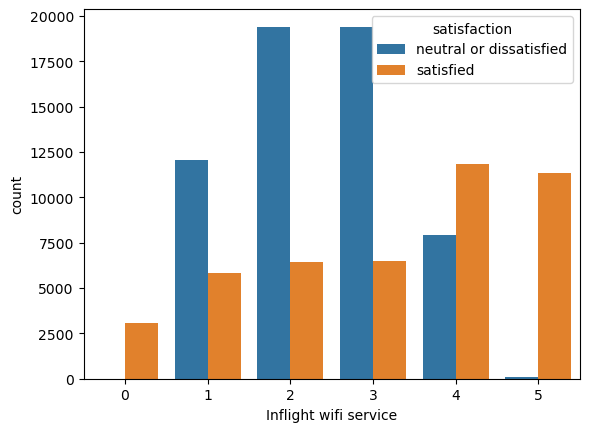

In [72]:
sns.countplot(df, x="Inflight wifi service", hue="satisfaction");

## Inference
- Customers who rated their inflight wifi experience as 4-5 were satisfied with their experience

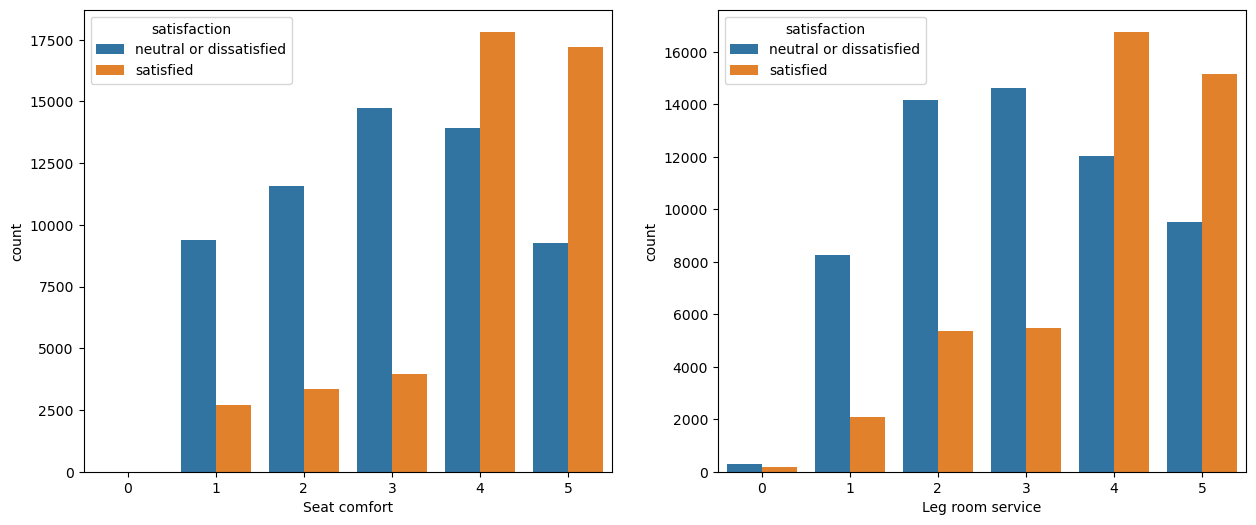

In [77]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(df, x="Seat comfort", hue="satisfaction", ax=ax[0])
sns.countplot(df, x="Leg room service", hue="satisfaction", ax=ax[1])
plt.show();

## Inference
- Most of the customers who rated their experience between 4-5 were satisfied with the flight

# Missing Value Imputation

In [23]:
df.isnull().sum()/len(df)*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [8]:
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median(axis=0), inplace=True)

In [25]:
df.isnull().sum()/len(df)*100

id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

In [26]:
df.describe()

,Age,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000
mean,39.379706,14.815618,15.133392
std,15.114964,38.230901,38.649776
min,7.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000
50%,40.000000,0.000000,0.000000
75%,51.000000,12.000000,13.000000
max,85.000000,1592.000000,1584.000000


# Handling Categorical Feat

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 103904 non-null  category
 1   Gender                             103904 non-null  object  
 2   Customer Type                      103904 non-null  category
 3   Age                                103904 non-null  int64   
 4   Type of Travel                     103904 non-null  category
 5   Class                              103904 non-null  category
 6   Flight Distance                    103904 non-null  category
 7   Inflight wifi service              103904 non-null  category
 8   Departure/Arrival time convenient  103904 non-null  category
 9   Ease of Online booking             103904 non-null  category
 10  Gate location                      103904 non-null  category
 11  Food and drink            

## Dividing numerical and categorical feat

In [9]:
df.drop(columns = df.iloc[:,[0]], inplace=True)

In [10]:
df["Gender"] = df["Gender"].astype("category")

In [11]:
df["Flight Distance"] = df["Flight Distance"].astype("int64")

In [12]:
num_cols = [c for c in df.columns if df[c].dtype.name != "category" and c!= "satisfaction"]
cat_cols = [c for c in df.columns if df[c].dtype.name == "category"]

In [13]:
num_cols

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [14]:
cat_cols

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [15]:
binary_cols = [c for c in cat_cols if len(df[c].unique()) == 2]
non_binary_cols = [c for c in cat_cols if len(df[c].unique()) != 2]

In [16]:
binary_cols

['Gender', 'Customer Type', 'Type of Travel']

In [17]:
non_binary_cols

['Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

## Looking at the unique values for binary cols

In [67]:
for col in binary_cols:
    print(col+": ", end="")
    for uniq in df[col].unique():
        if uniq == df[col].unique()[-1]:
            print(uniq, end="")
        else:
            print(uniq, end=", ")
    print()        

Gender: Male, Female
Customer Type: Loyal Customer, disloyal Customer
Type of Travel: Personal Travel, Business travel


In [74]:
for uniq in df["Gender"].unique():
    print(type(uniq))

<class 'str'>
<class 'str'>


In [78]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied


In [79]:
df.at[0,"Gender"] 

'Male'

In [157]:
for col in binary_cols:
    print(df[col].describe(), end="\n\n")

count     103904
unique         2
top       Female
freq       52727
Name: Gender, dtype: object

count             103904
unique                 2
top       Loyal Customer
freq               84923
Name: Customer Type, dtype: object

count              103904
unique                  2
top       Business travel
freq                71655
Name: Type of Travel, dtype: object



In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()

In [20]:
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(df[col].describe(), end="\n\n")

count    103904.000000
mean          0.492541
std           0.499947
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Gender, dtype: float64

count    103904.000000
mean          0.182678
std           0.386404
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Customer Type, dtype: float64

count    103904.000000
mean          0.310373
std           0.462649
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Type of Travel, dtype: float64



In [21]:
df[binary_cols]

,Gender,Customer Type,Type of Travel
0,1,0,1
1,1,1,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
103899,0,1,0
103900,1,0,0
103901,1,1,0
103902,0,1,0


## One Hot Encoding for non-binary columns

In [22]:
df_nonbinary = pd.get_dummies(df[non_binary_cols])
df_nonbinary.columns

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [23]:
df_nonbinary.head()

,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False


In [24]:
len(df_nonbinary.columns)

86

## Normalization of numerical feats

In [25]:
df_num = df[num_cols]
df_num.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [26]:
df_num = (df_num - df_num.mean(axis=0))/df_num.std(axis=0)
df_num.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-1.926734e-17,7.727453e-17,-9.847374e-18,-3.966303e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01


## Table Formation

In [27]:
target = df["satisfaction"]
data = pd.concat([df_num, df_nonbinary, df[binary_cols]], axis=1)
data.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Gender,Customer Type,Type of Travel
0,-1.745271,-0.731535,0.266391,0.074169,False,False,True,False,False,False,...,True,False,False,False,False,False,True,1,0,1
1,-0.951356,-0.957179,-0.361373,-0.236312,True,False,False,False,False,False,...,False,False,True,False,False,False,False,1,1,0
2,-0.885196,-0.047584,-0.387530,-0.391552,True,False,False,False,False,True,...,False,False,False,False,False,False,True,0,0,0
3,-0.951356,-0.629243,-0.099805,-0.158692,True,False,False,False,False,True,...,False,False,False,True,False,False,False,0,0,0
4,1.430390,-0.978239,-0.387530,-0.391552,True,False,False,False,False,False,...,False,False,False,False,True,False,False,1,0,0


In [28]:
data.shape

(103904, 93)

In [29]:
data.describe(include="all")

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Gender,Customer Type,Type of Travel
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,103904,103904,103904,103904,103904,103904,...,103904,103904,103904,103904,103904,103904,103904,103904.000000,103904.000000,103904.000000
unique,NaN,NaN,NaN,NaN,2,2,2,2,2,2,...,2,2,2,2,2,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,54239,57159,96410,100801,86064,78074,...,76788,103892,90586,87772,79330,76725,81215,NaN,NaN,NaN
mean,-1.926734e-17,7.727453e-17,-9.847374e-18,-3.966303e-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.492541,0.182678,0.310373
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499947,0.386404,0.462649
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000


# Modelling

## Splitting data into train and test sets

In [30]:
y = target
X = data

In [31]:
X.shape

(103904, 93)

In [32]:
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

In [33]:
X.columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [35]:
X_train.shape

(93513, 93)

In [36]:
X_test.shape

(10391, 93)

## Modelling using KNN

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.set_params(n_neighbors=10)

KNeighborsClassifier(n_neighbors=10)

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
train_err = np.mean(y_train != knn.predict(X_train))
test_err = np.mean(y_test != knn.predict(X_test))

print(f"training error: {train_err}")
print(f"test error: {test_err}")

training error: 0.05307283479302343
test error: 0.06245789625637571


## Modelling using Random Forest

In [41]:
rf = ensemble.RandomForestClassifier(n_estimators=100)

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
train_err = np.mean(y_train != rf.predict(X_train))
test_err = np.mean(y_test != rf.predict(X_test))

print(f"training error: {train_err}")
print(f"test error: {test_err}")

training error: 0.0
test error: 0.03897603695505726


## Modelling using XGBoost

In [57]:
y_train = y_train.astype("category")

In [58]:
y_train

86596     neutral or dissatisfied
195       neutral or dissatisfied
28801     neutral or dissatisfied
69147     neutral or dissatisfied
48961                   satisfied
                   ...           
54886     neutral or dissatisfied
76820     neutral or dissatisfied
103694    neutral or dissatisfied
860                     satisfied
15795     neutral or dissatisfied
Name: satisfaction, Length: 93513, dtype: category
Categories (2, object): ['neutral or dissatisfied', 'satisfied']

In [59]:
from xgboost import XGBClassifier

In [60]:
clf = XGBClassifier(tree_method="gpu_hist", enable_categorical=True, max_cat_to_onehot=1)

In [61]:
clf.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['neutral or dissatisfied' 'satisfied']